#### Importando as bibliotecas

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline

#### Importando os dados

In [219]:
original_data_df = pd.read_csv('dados-vazao.csv')
original_data_df

,Data,Intervalo,Vazao
0,12-12-2022,00:00:00 a 06:00:00,-1.0
1,12-12-2022,06:00:00 a 12:00:00,-1.0
2,12-12-2022,12:00:00 a 18:00:00,717907237.0
3,12-12-2022,18:00:00 a 23:59:59,918369832.5
4,13-12-2022,00:00:00 a 06:00:00,-1.0
...,...,...,...
667,9-6-2023,18:00:00 a 23:59:59,917344053.0
668,10-6-2023,00:00:00 a 06:00:00,920256395.5
669,10-6-2023,06:00:00 a 12:00:00,920281898.0
670,10-6-2023,12:00:00 a 18:00:00,-1.0


#### Visualizando os dados

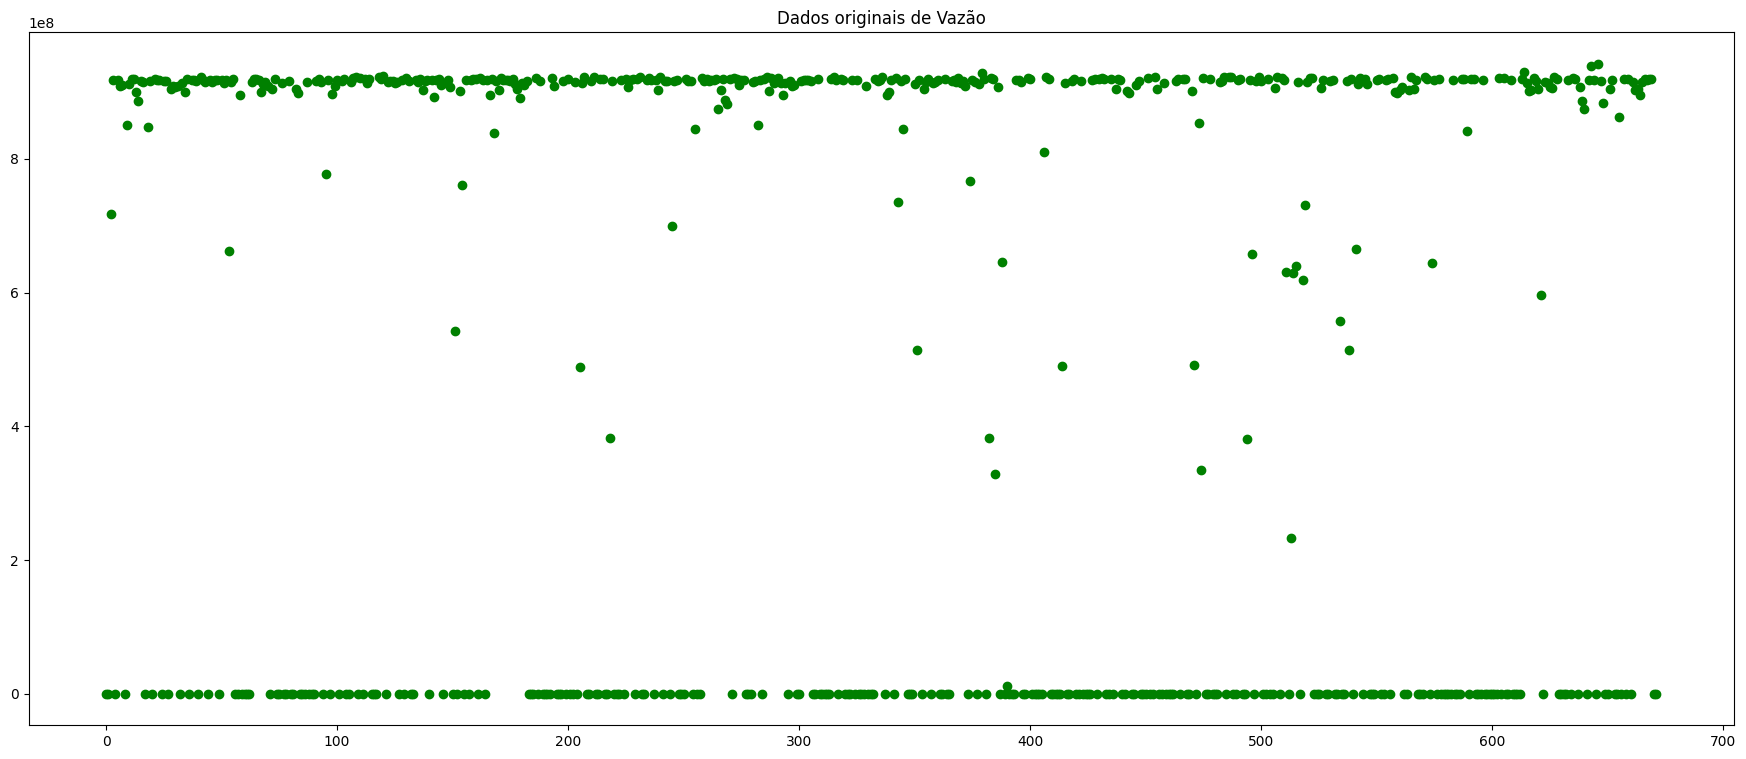

In [220]:
plt.figure(figsize=(22, 9))
plt.title('Dados originais de Vazão')
plt.plot(original_data_df.index, original_data_df['Vazao'], 'go')
plt.show()

#### Removendo os dados faltantes

In [221]:
data_df = original_data_df[original_data_df['Vazao'] != -1].copy()
data_df

,Data,Intervalo,Vazao
2,12-12-2022,12:00:00 a 18:00:00,717907237.0
3,12-12-2022,18:00:00 a 23:59:59,918369832.5
5,13-12-2022,06:00:00 a 12:00:00,917452763.0
6,13-12-2022,12:00:00 a 18:00:00,909299198.0
7,13-12-2022,18:00:00 a 23:59:59,910559635.0
...,...,...,...
665,9-6-2023,06:00:00 a 12:00:00,915510511.0
666,9-6-2023,12:00:00 a 18:00:00,918808472.0
667,9-6-2023,18:00:00 a 23:59:59,917344053.0
668,10-6-2023,00:00:00 a 06:00:00,920256395.5


#### Visualizando os novos dados

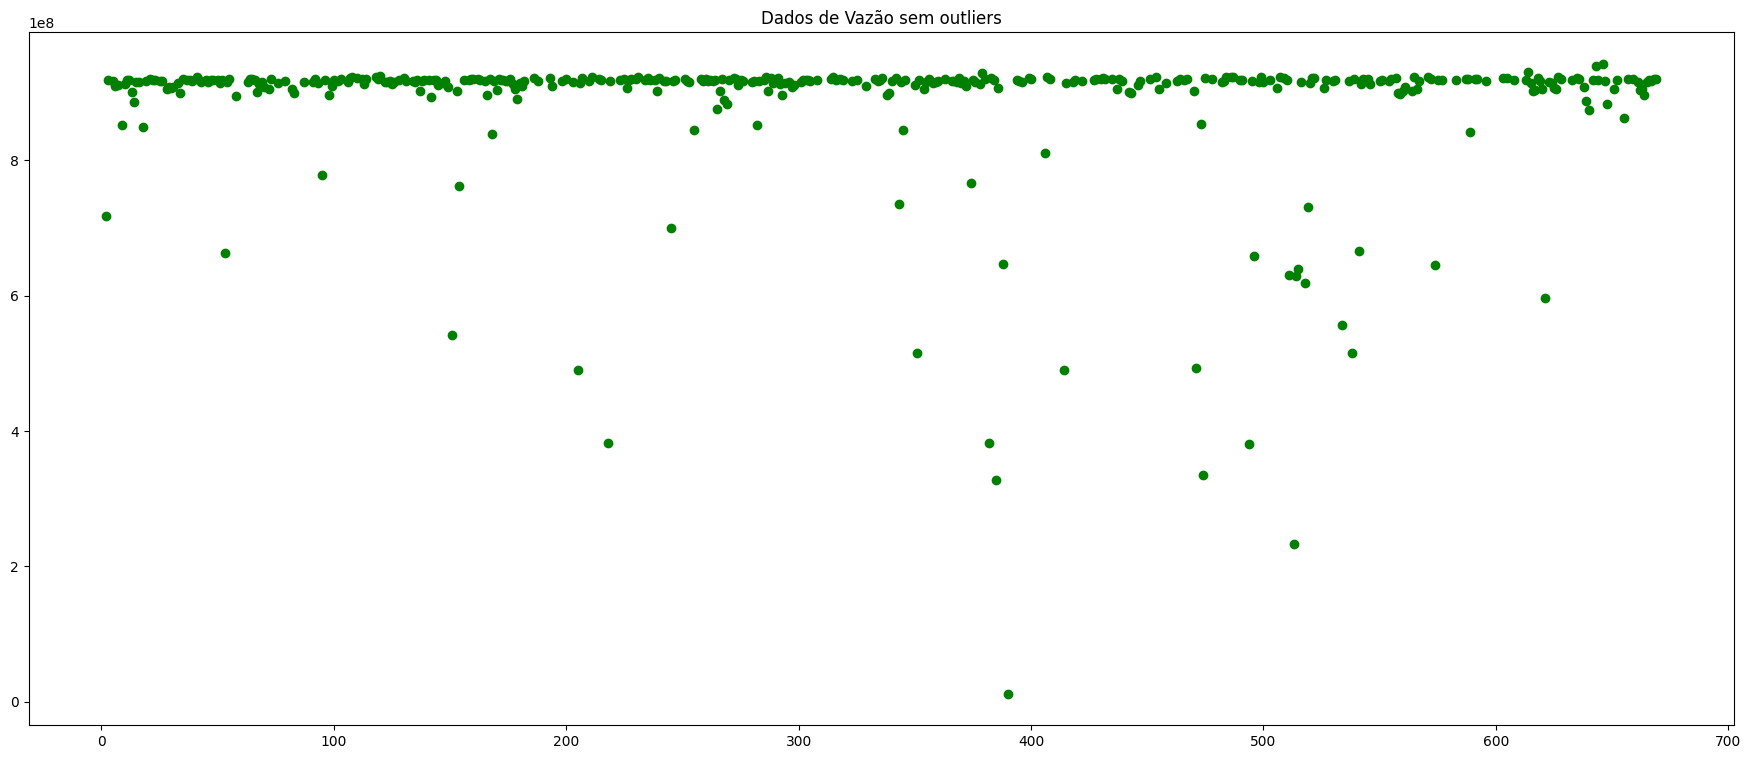

In [222]:
plt.figure(figsize=(22, 9))
plt.title('Dados de Vazão sem outliers')
plt.plot(data_df.index, data_df['Vazao'], 'go')
plt.show()

#### Criando o B-Spline

In [223]:
# smoothing = 672-(2*672)**(1/2) # Recomendado pela biblioteca
smoothing = 0
spline_degree = 3

x = data_df.index
y = data_df['Vazao']

t, c, k = splrep(x, y, s=smoothing, k=spline_degree)
spline = BSpline(t, c, k)

#### Criando o intervalo de interpolação

Os novos índices nos quais o spline deverá mostrar os dados criados artificialmente.

Vamos utilizar o intervalo original (0, 671), mas não discreto. Isto é, ao invés de (0, 1, 2, ..., 671), teremos (0, 0.1, 0.2, ..., 1.0, 1.1, ..., 671).

Vamos utilizar a variável **knot_distance** para representar a distância entre dois pontos de dados no intervalo. Isto é, se quisermos que entre 1 e 2 tenhamos 11 números (1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0), fazemos `knot_distance = 11`.

In [224]:
knot_distance = 10
x_new = np.linspace(0, 671, 671 * knot_distance)

print(x_new)

[0.00000000e+00 1.00014905e-01 2.00029811e-01 ... 6.70799970e+02
 6.70899985e+02 6.71000000e+02]


#### Calculando a interpolação no novo intervalo

Agora usamos o spline aplicado no intervalo criado para ver quais valores ele decide para as vazões não mensuradas.

In [225]:
y_fit = spline(x_new)
print(f"Quantidade de novos dados: {len(y_fit)}")
print(f"Dados interpolados: {y_fit}")

Quantidade de novos dados: 6710
Dados interpolados: [-6.21778945e+08 -5.15190273e+08 -4.13414569e+08 ...  8.81433203e+08
  8.76898217e+08  8.72046985e+08]


#### Visualizando a interpolação

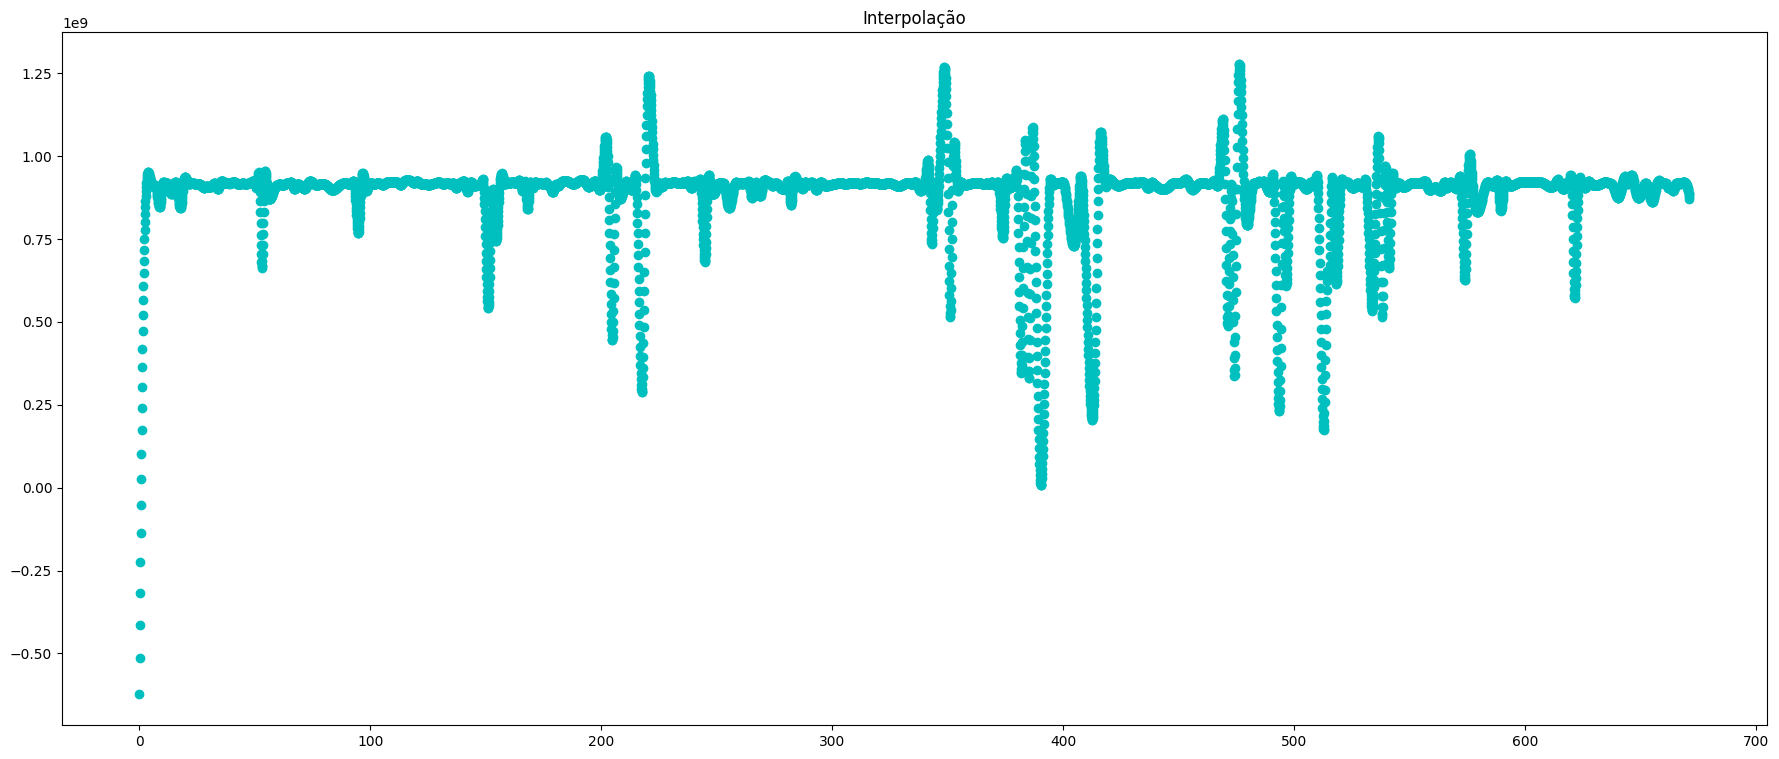

In [226]:
plt.figure(figsize=(22, 9))
plt.title('Interpolação')
plt.plot(x_new, y_fit, 'co')
plt.show()

#### Interpolação e dados originais

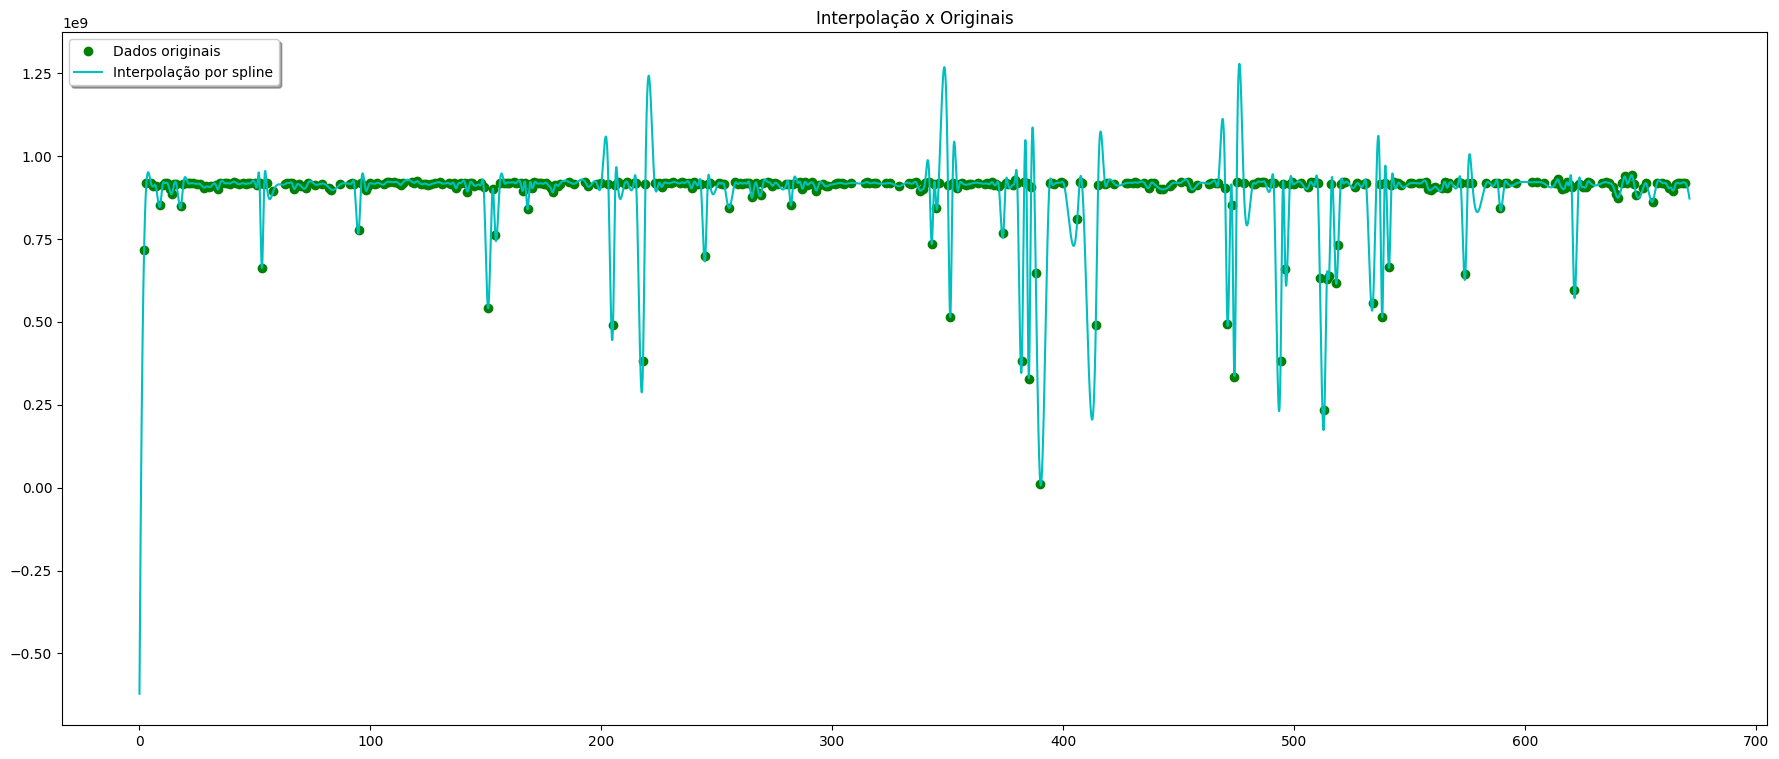

In [227]:
plt.figure(figsize=(22, 9))
plt.title('Interpolação x Originais')
plt.plot(x, y, 'go', label='Dados originais')
plt.plot(x_new, y_fit, 'c-', label='Interpolação por spline')
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()

#### Olhando mais de perto

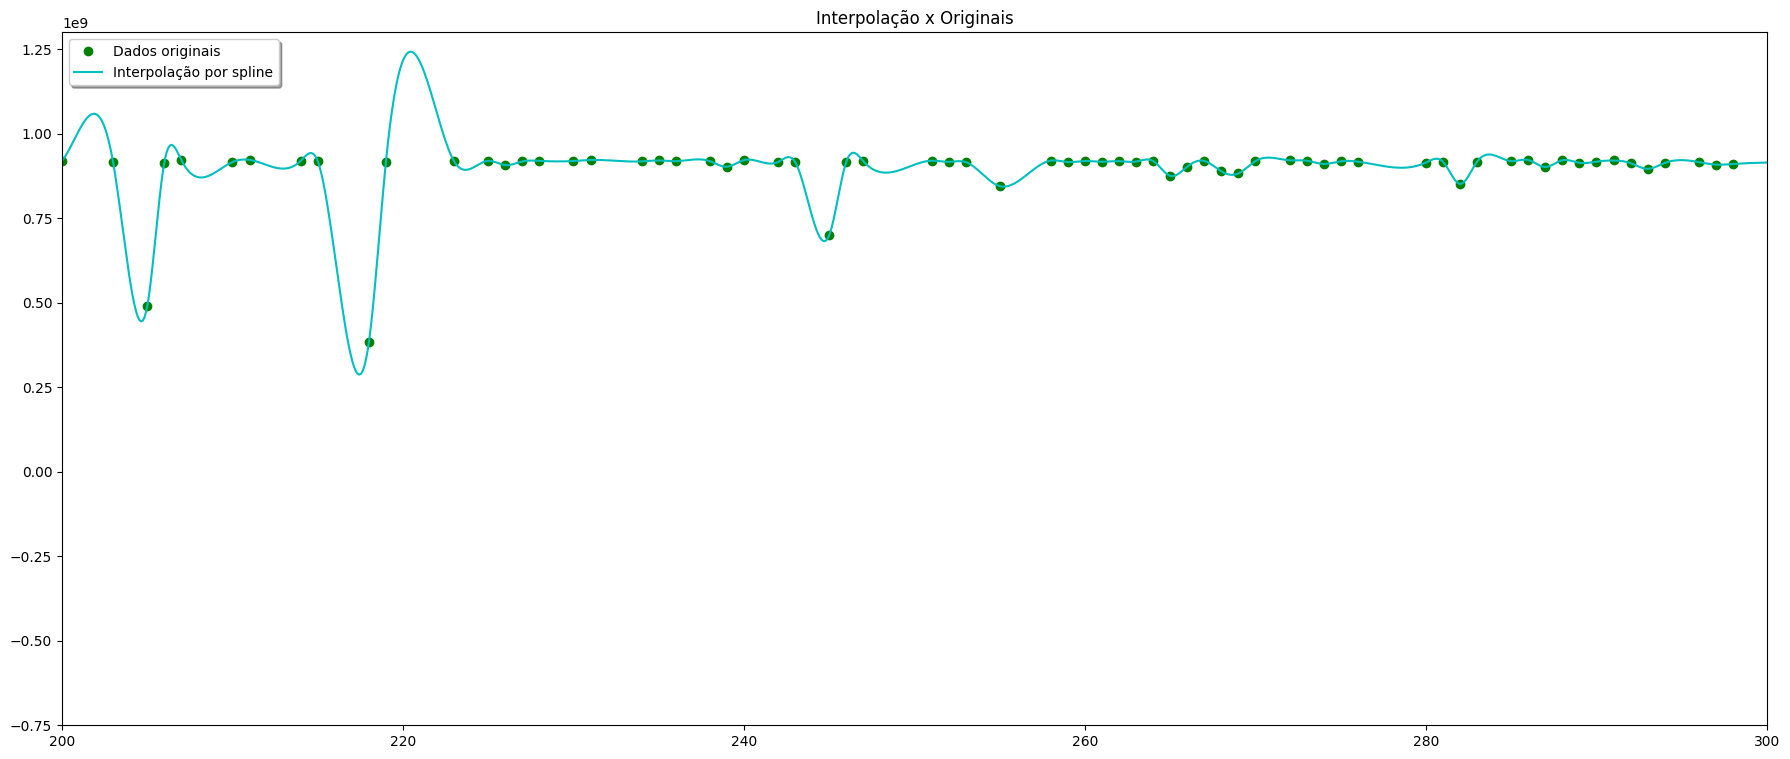

In [228]:
plt.figure(figsize=(22, 9))
plt.title('Interpolação x Originais')
plt.plot(x, y, 'go', label='Dados originais')
plt.plot(x_new, y_fit, 'c-', label='Interpolação por spline')
plt.xlim(xmin=200, xmax=300)
plt.ylim((-0.75e9, 1.30e9))
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()

#### Obtendo valores específicos

Pode ser útil obter um valor específico sintético interpolado pelo spline. Principalmente nos pontos onde a vazão não pôde ser medida (com valor igual a -1).

Para isto, basta passarmos o(s) valor(es) de índice(s) como argumento(s) de função para nosso spline:

In [229]:
indice = 17
print(f'Valor interpolado no índice {indice}: {spline(indice)}')

Valor interpolado no índice 17: 863992058.8684343


Além disso, podemos reconstruir os dados não mensurados através do spline:

In [230]:
dados_faltantes = original_data_df[original_data_df['Vazao'] == -1].copy()
dados_faltantes['Vazao Sintetica'] = spline(dados_faltantes.index)
dados_faltantes

,Data,Intervalo,Vazao,Vazao Sintetica
0,12-12-2022,00:00:00 a 06:00:00,-1.0,-6.217789e+08
1,12-12-2022,06:00:00 a 12:00:00,-1.0,2.403189e+08
4,13-12-2022,00:00:00 a 06:00:00,-1.0,9.490904e+08
8,14-12-2022,00:00:00 a 06:00:00,-1.0,8.663919e+08
17,16-12-2022,06:00:00 a 12:00:00,-1.0,8.639921e+08
...,...,...,...,...
656,7-6-2023,00:00:00 a 06:00:00,-1.0,8.884291e+08
658,7-6-2023,12:00:00 a 18:00:00,-1.0,9.259056e+08
660,8-6-2023,00:00:00 a 06:00:00,-1.0,9.193912e+08
670,10-6-2023,12:00:00 a 18:00:00,-1.0,9.075142e+08


#### Reconstrução do dataset original

Da mesma forma que mostrado acima, podemos completar os dados originais nos casos que não puderam ser medidos (vazão = -1).

In [231]:
reconstrucao_df = original_data_df.copy()

for index in reconstrucao_df[reconstrucao_df['Vazao'] == -1].index:
    interpolacao = spline(index)
    reconstrucao_df.loc[index, 'Vazao'] = interpolacao

reconstrucao_df

,Data,Intervalo,Vazao
0,12-12-2022,00:00:00 a 06:00:00,-6.217789e+08
1,12-12-2022,06:00:00 a 12:00:00,2.403189e+08
2,12-12-2022,12:00:00 a 18:00:00,7.179072e+08
3,12-12-2022,18:00:00 a 23:59:59,9.183698e+08
4,13-12-2022,00:00:00 a 06:00:00,9.490904e+08
...,...,...,...
667,9-6-2023,18:00:00 a 23:59:59,9.173441e+08
668,10-6-2023,00:00:00 a 06:00:00,9.202564e+08
669,10-6-2023,06:00:00 a 12:00:00,9.202819e+08
670,10-6-2023,12:00:00 a 18:00:00,9.075142e+08


#### Visualizando a reconstrucao

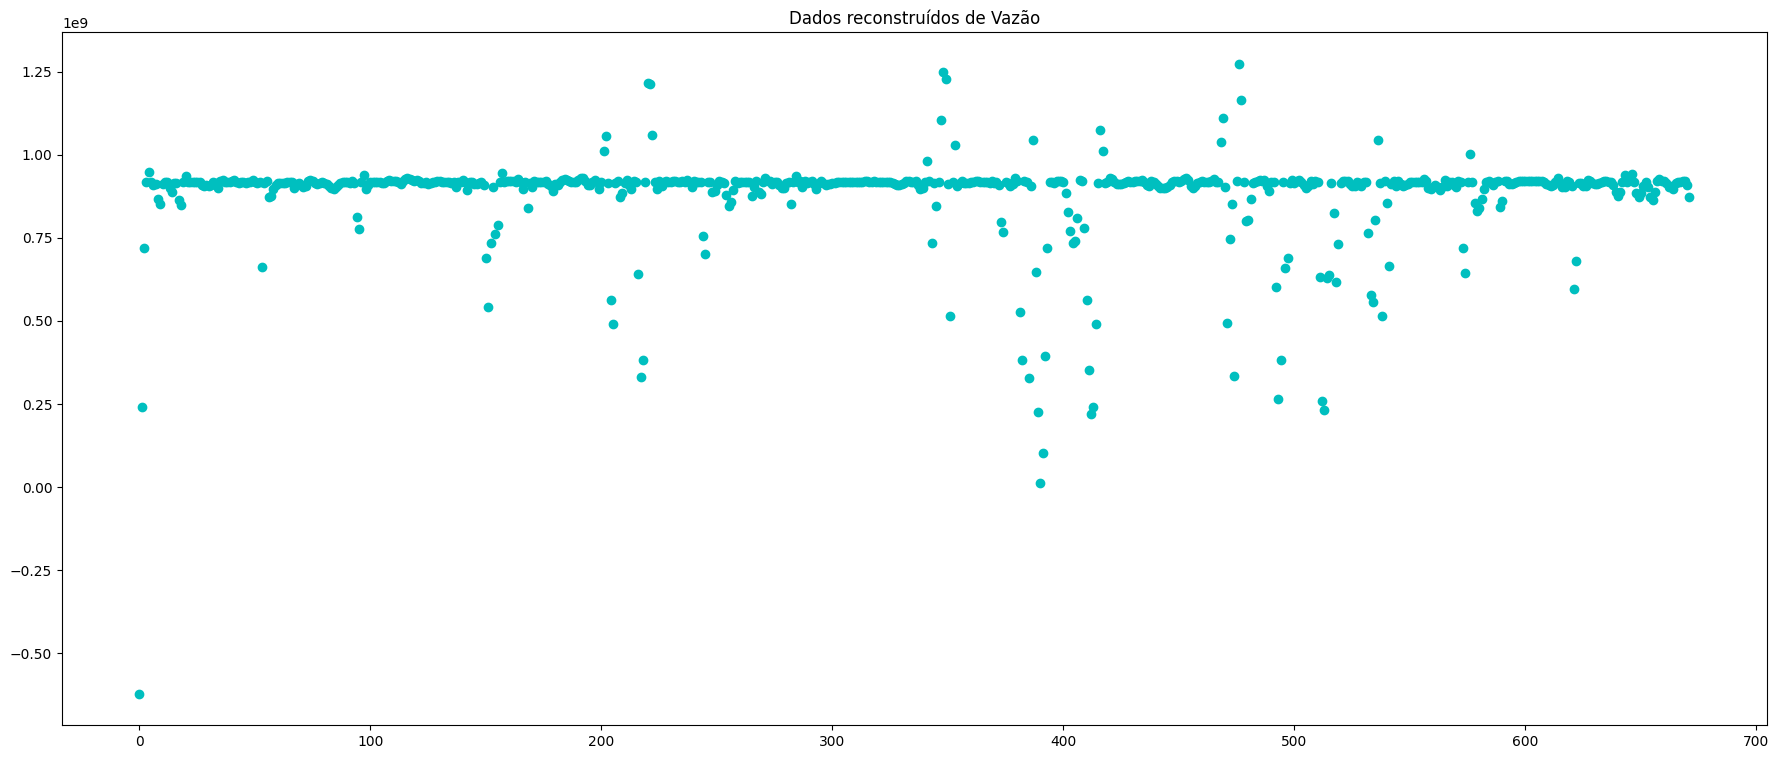

In [232]:
plt.figure(figsize=(22, 9))
plt.title('Dados reconstruídos de Vazão')
plt.plot(reconstrucao_df.index, reconstrucao_df['Vazao'], 'co')
plt.show()